# MNIST Dataset

In [155]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [156]:
pwd


'C:\\Users\\neibo'

In [157]:
mnist_test = pd.read_csv(r"C:\Users\neibo\Documents\mnist_test.csv")
mnist_train = pd.read_csv(r"C:\Users\neibo\Documents\mnist_train.csv")

# Pré-processamento

Como os dados já estão limpos, apenas devemos separar os dados em input (x) e output (y).

In [200]:
x_train = np.array(mnist_train.iloc[:, 1:])
y_train = np.array(mnist_train.iloc[:, 0])

x_test = np.array(mnist_test.iloc[:, 1:])
y_test = np.array(mnist_train.iloc[:, 0])

In [196]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (60000,)


Deixar todos os valores dos pixels entre 0 e 1 (Normalização) para facilitar o aprendizado do modelo

In [189]:
x_train = tf.keras.utils.normalize(x_train,axis =1)
x_test = tf.keras.utils.normalize(x_test,axis =1)



Função para mostrar as imagens do dataset que vamos trabalhar

In [190]:
def show_img(x):
    plt.figure(figsize=(8,7))
    if x.shape[0] > 100:
        print(x.shape[0])
        n_imgs = 16
        n_samples = x.shape[0]
        x = x.reshape(n_samples, size_img, size_img)
        for i in range(16):
            plt.subplot(4, 4, i+1) #devide figure into 4x4 and choose i+1 to draw
            plt.imshow(x[i])
        plt.show()
    else:
        plt.imshow(x)
        plt.show()

60000


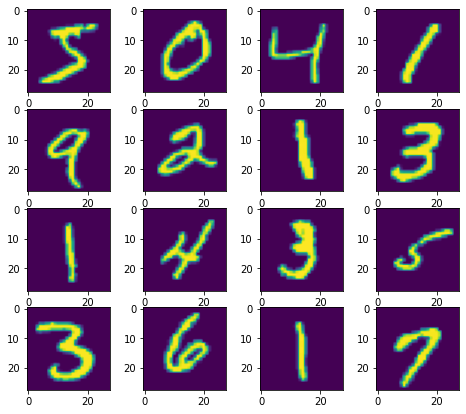

In [191]:
show_img(x_train)

# Processamento

In [192]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(), #converter para uma matriz de 1d para melhorar desempenho
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(128, activation='sigmoid'),
            tf.keras.layers.Dense(10, activation='softmax') 
])

In [193]:
model.compile(optimizer = 'rmsprop', 
    loss ='sparse_categorical_crossentropy', 
    metrics= ['accuracy'])

In [194]:
model.fit(x_train, y_train, epochs = 4)

Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7000 - accuracy: 0.7873
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1814 - accuracy: 0.9453


Acurácia e loss do teste

In [198]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)


ValueError: Data cardinality is ambiguous:
  x sizes: 10000
  y sizes: 60000
Make sure all arrays contain the same number of samples.